<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Reclama%C3%A7%C3%B5es_Gov%20(Projeto%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploatória 

Este DataFrame faz uma análise dos dados extraídos do site consumidor.gov.br, cuja a vídeo aula explicativa encontra-se no sítio: https://www.youtube.com/watch?v=J456JdeWazQ.

In [0]:
#Importando as bibliotecas.
!pip install pandas -q  #atualização pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Verificação da versão do pandas que foi instalada.

In [0]:
pd.__version__

'1.0.3'

In [0]:
df = pd.read_csv("/content/drive/My Drive/DataFrames/2_semestre_2016.csv", sep=";", encoding="latin1")
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,NE,PI,São Raimundo Nonato,M,entre 21 a 30 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,S,S,Finalizada avaliada,Resolvida,4.0,1
1,CO,GO,Aparecida de Goiânia,F,entre 21 a 30 anos,30/07/2016,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Má qualidade no atendimento presencial ou outr...,Domicílio,S,S,Finalizada avaliada,Não Resolvida,5.0,1
2,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,31/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,30/07/2016,0.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
4,SE,MG,Oliveira,F,até 20 anos,30/07/2016,1.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Demais aparelhos de comunicação,Cobrança / Contestação,Dificuldade na devolução de valores pagos / re...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,3.0,1


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df.describe()

,Tempo Resposta,Nota do Consumidor,Total
count,161993.000000,95118.000000,162584.0
mean,6.440247,3.320108,1.0
std,3.378037,1.696041,0.0
min,0.000000,1.000000,1.0
25%,3.000000,1.000000,1.0
50%,8.000000,4.000000,1.0
75%,9.000000,5.000000,1.0
max,12.000000,5.000000,1.0


##Número de Reclamações x Estado

UF
AC      554
AL      647
AM     1026
AP      173
BA     8269
CE     5362
DF     7057
ES     3612
GO     4355
MA     1572
MG    14356
MS     1548
MT     4108
PA     1721
PB     1586
PE     4192
PI      908
PR    15107
RJ    16895
RN     1238
RO      565
RR      220
RS    14615
SC     4898
SE      750
SP    44905
TO     2345
Name: UF, dtype: int64

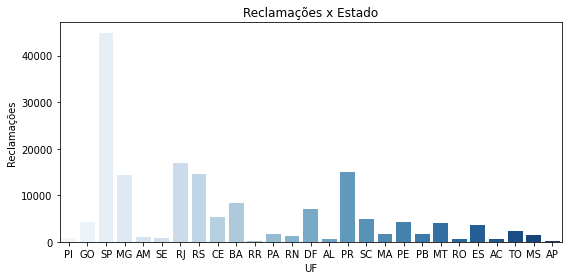

In [0]:
#Encontrar o número de reclamaçõesxEstado 
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(df["UF"], ax=ax, palette="Blues")
ax.set_title("Reclamações x Estado")
ax.set_ylabel("Reclamações")
plt.tight_layout();

#Gráfico acima pode ser feito de outra forma
df.groupby("UF")["UF"].count()



##Número de Reclamações por Sexo

In [0]:
#Número de reclamações x Sexo.
df["Sexo"].value_counts()




M    95462
F    67122
Name: Sexo, dtype: int64

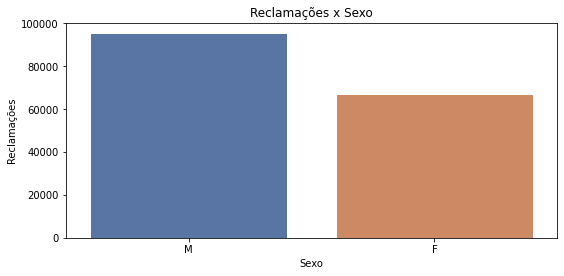

In [0]:
#Gráfico.
fig, ax = plt.subplots(figsize=(8,4))
sns.set(context="notebook", style="darkgrid", color_codes=True)
sns.countplot(df["Sexo"])
ax.set_title("Reclamações x Sexo")
ax.set_ylabel("Reclamações")
plt.tight_layout();

#Outra forma de plotar o gráfico.
#sexo = df["Sexo"].unique()
#count = df["Sexo"].value_counts()
#sns.barplot(x=sexo , y=count)
#plt.tight_layout();



##Faixa etária de consumidores por sexo.

In [0]:
df.groupby("Sexo")["Faixa Etária"].value_counts()

Sexo  Faixa Etária      
F     entre 21 a 30 anos    20470
      entre 31 a 40 anos    19617
      entre 41 a 50 anos    10626
      entre 51 a 60 anos     8306
      entre 61 a 70 anos     4242
      até 20 anos            1958
      mais de 70 anos        1903
M     entre 21 a 30 anos    33597
      entre 31 a 40 anos    31049
      entre 41 a 50 anos    13501
      entre 51 a 60 anos     8171
      entre 61 a 70 anos     4260
      até 20 anos            3170
      mais de 70 anos        1714
Name: Faixa Etária, dtype: int64

##Consumidores mais jovens contrataram o serviço pela intenet ?

In [0]:
#Averiguação das formas de contratação
df["Como Comprou Contratou"].unique()

array(['Loja física', 'Domicílio', 'Não comprei / contratei', 'Internet',
       'Telefone', 'SMS / Mensagem de texto', 'Stand, feiras e eventos',
       'Catálogo', 'Ganhei de presente'], dtype=object)

In [0]:
#Selecionando apenas quem comprou ou contratou pela intenet.
df2 = df[df["Como Comprou Contratou"] == "Internet"]
#Agrupando quem comprou ou contratou pela intenet com a respectiva Fáixa Etária.
df2.groupby("Faixa Etária")["Como Comprou Contratou"].value_counts()

Faixa Etária        Como Comprou Contratou
até 20 anos         Internet                   1729
entre 21 a 30 anos  Internet                  17255
entre 31 a 40 anos  Internet                  14514
entre 41 a 50 anos  Internet                   4913
entre 51 a 60 anos  Internet                   2481
entre 61 a 70 anos  Internet                   1025
mais de 70 anos     Internet                    297
Name: Como Comprou Contratou, dtype: int64

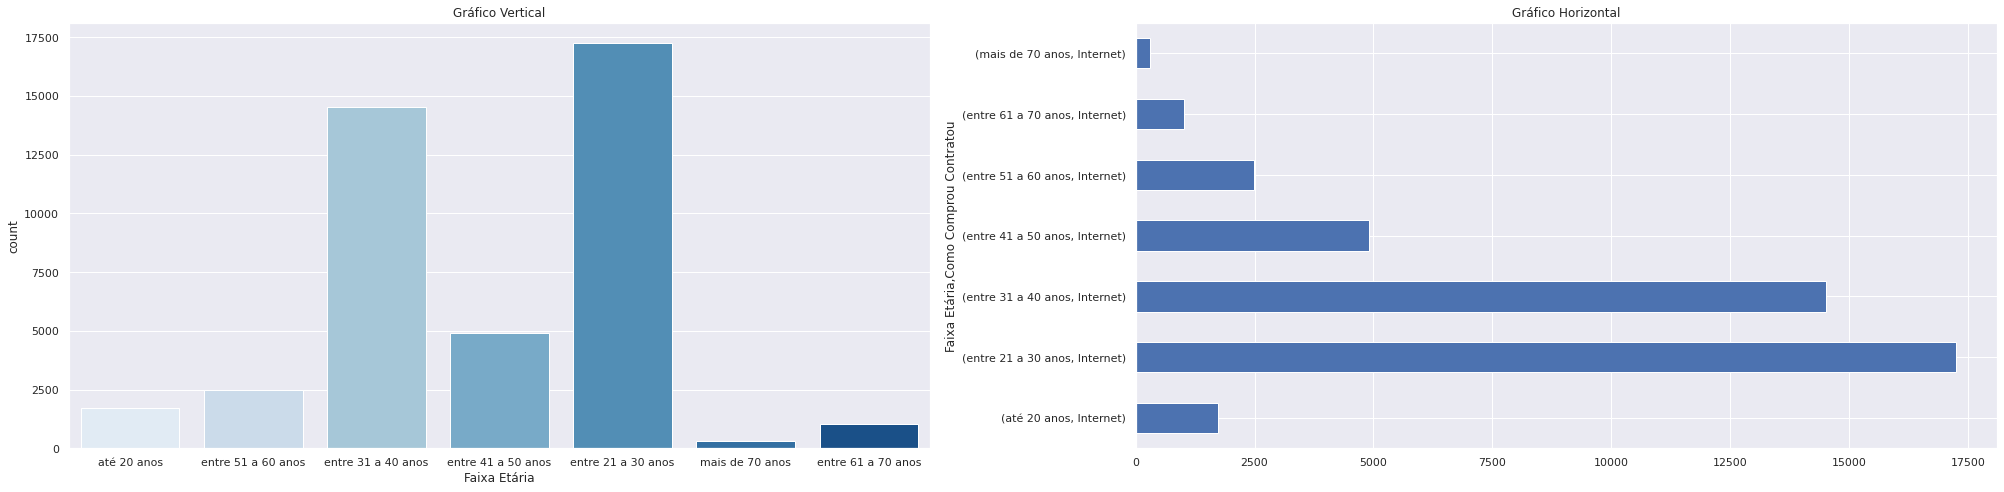

In [0]:
#Gráfico #utilizar o site COLOR BREWER 2.0 para encontrar o código das Paletas de Cores.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(28,7))
     
sns.countplot(df2["Faixa Etária"], ax=ax1, palette="Blues")
df2.groupby("Faixa Etária")["Como Comprou Contratou"].value_counts().plot.barh(ax = ax2)
ax1.set_title("Gráfico Vertical")
ax2.set_title("Gráfico Horizontal")
plt.tight_layout();

##Estes consumidores procuram a empresa antes de registrar alguma reclamação ?

In [0]:
df3 = df[df["Faixa Etária"] == "entre 21 a 30 anos"].count()

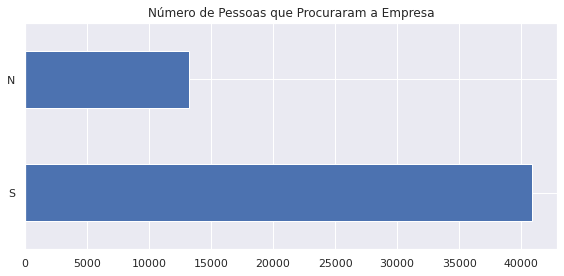

In [0]:
#Gráfico do Número de pessoas que procuraram a empresa.
df3 = df[df["Faixa Etária"] == "entre 21 a 30 anos"]

fig, ax = plt.subplots(figsize=(8,4))
df3["Procurou Empresa"].value_counts().plot.barh()
ax.set_title("Número de Pessoas que Procuraram a Empresa")
plt.tight_layout()

##Qual grupo problema mais comum ?

In [0]:
df["Grupo Problema"].value_counts()

Cobrança / Contestação    67074
Contrato / Oferta         29460
Vício de Qualidade        20832
Atendimento / SAC         19883
Informação                18322
Entrega do Produto         6403
Saúde e Segurança           610
Name: Grupo Problema, dtype: int64

##Quantidade de reclamações por segmento de marcado ?

In [0]:
#Identificar quais os segmentos que mais possuem reclamações.
segmento = df["Segmento de Mercado"].value_counts()
segmento

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    73929
Bancos, Financeiras e Administradoras de Cartão                            37912
Bancos de Dados e Cadastros de Consumidores                                18069
Comércio Eletrônico                                                        14417
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       4364
Varejo                                                                      2169
Transporte Aéreo                                                            2086
Corretoras e Sociedades de Seguros, Capitalização e Previdência             1360
Energia Elétrica, Gás, Água e Esgoto                                        1313
Operadoras de Planos de Saúde e Administradoras de Benefícios                984
Perfumaria, Cosméticos e Higiene Pessoal                                     929
Programas de Fidelidade                                                      927
Fabricantes - Linha Branca  

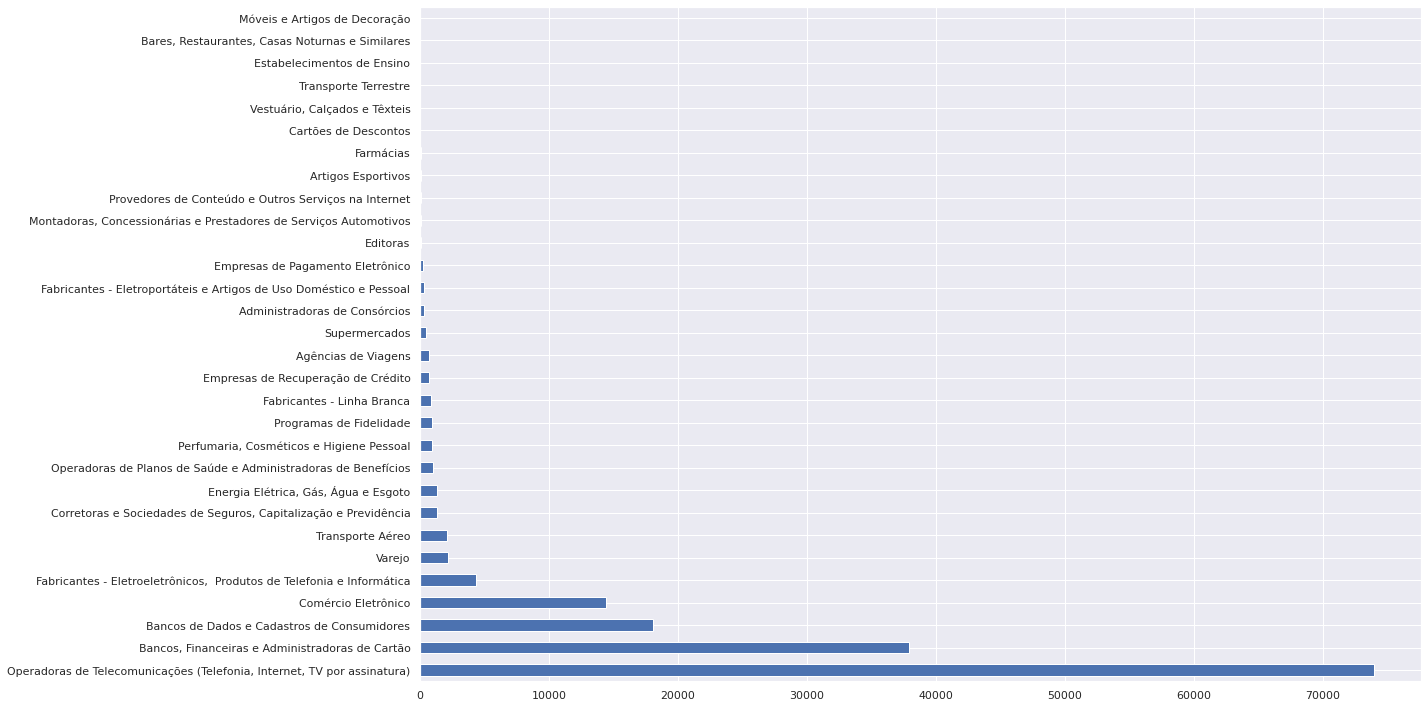

In [0]:
#Plotagem do Gráfico
fig, ax = plt.subplots(figsize=(20,10))
df["Segmento de Mercado"].value_counts().plot.barh()
plt.tight_layout();


##Rank das TOP 20 Empresas com reclamações

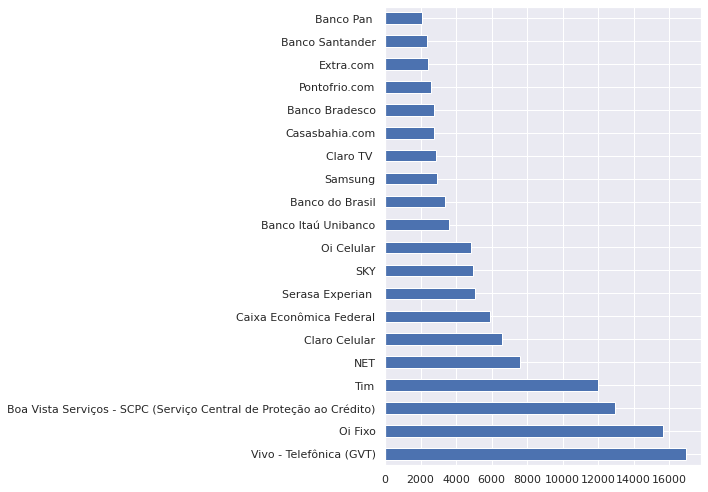

In [0]:
#Nome das Empresas
df["Nome Fantasia"].value_counts()[:20].plot.barh(figsize=(10,7))
plt.tight_layout();

##Listagem e contagem de problemas do grupo.

In [0]:
#falta colocar em ordem crescente de casoso - pesquisar 
df4 = df[df["Grupo Problema"] == "Cobrança / Contestação"]
df4.groupby("Nome Fantasia")["Grupo Problema"].value_counts()


Nome Fantasia                Grupo Problema        
Agiplan                      Cobrança / Contestação     58
Aliança do Brasil            Cobrança / Contestação      8
American Express - Amex      Cobrança / Contestação    163
Americanas Viagens           Cobrança / Contestação      1
Americanas.com               Cobrança / Contestação    253
                                                      ... 
Walmart.com                  Cobrança / Contestação    104
Zurich Minas Brasil Seguros  Cobrança / Contestação      4
Águas Guariroba              Cobrança / Contestação     16
Âncora Consórcios            Cobrança / Contestação      9
Época Cosméticos             Cobrança / Contestação      1
Name: Grupo Problema, Length: 260, dtype: int64

##Tempo de resposta tem alguma relação com a nota do consumidor ?

In [0]:
import pandas as pd

df5 = df.drop('Total',axis=1)
corr = df5.corr()
corr.style.background_gradient(cmap='coolwarm')


,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.118709
Nota do Consumidor,-0.118709,1.000000


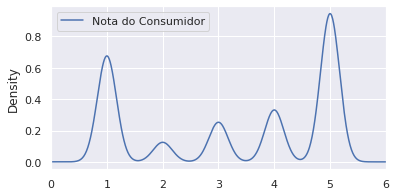

In [0]:
df.plot.density(y='Nota do Consumidor',xlim=[0,6],figsize=[6,3]);

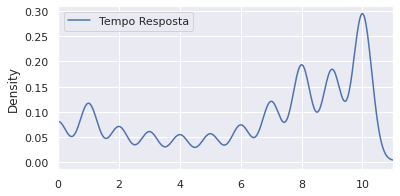

In [0]:
df.plot.density(y='Tempo Resposta',xlim=[0,11],figsize=[6,3]);

##Proporção de reclamações registradas e não atendidas.

In [0]:
x = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]



In [0]:
df5 = df[df[u'Segmento de Mercado'].isin(x.keys())]
df5 = df[df[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df5.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
x1

Segmento de Mercado
Administradoras de Consórcios                                               112
Agências de Viagens                                                         173
Artigos Esportivos                                                           24
Bancos de Dados e Cadastros de Consumidores                                3402
Bancos, Financeiras e Administradoras de Cartão                            8300
Comércio Eletrônico                                                        5318
Corretoras e Sociedades de Seguros, Capitalização e Previdência             399
Editoras                                                                     32
Empresas de Pagamento Eletrônico                                             46
Empresas de Recuperação de Crédito                                          185
Energia Elétrica, Gás, Água e Esgoto                                        530
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática      1272
Fabricantes - Eletro

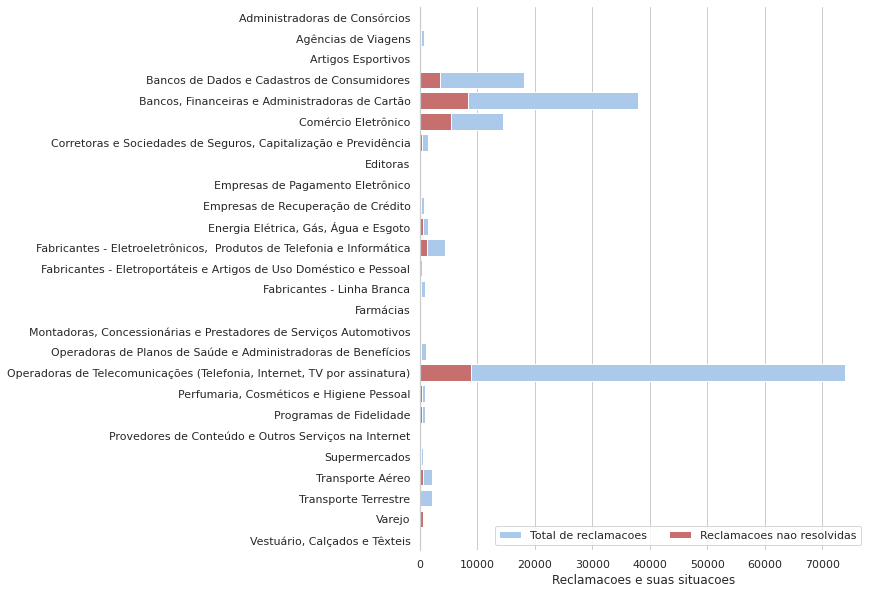

In [0]:
import seaborn as sns

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

##Análise de Reclamações por região.

In [0]:
municipios = pd.read_excel('/content/drive/My Drive/DataFrames/municipiosBrasil.xls',encoding='latin1')

In [0]:
import unicodedata
import re
def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
    palavraSemAcento = str(palavraSemAcento).upper()
    return palavraSemAcento

df['Cidade2'] = df['Cidade'].apply(remover_acentos)

In [0]:
import folium
from folium import plugins

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start= "05",tiles='Stamen Toner')
coordenadas=[]
for cid,uf in zip(df.Cidade2[:20000],df.UF[:20000]):
    cidadeUf = cid+' - '+uf
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    if lat != '' and long != '':
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
        coordenadas.append([lat,long])
     
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


##Avaliando o desempenho das Instituições financeiras.

In [0]:
df6 = df[df['Segmento de Mercado']==u'Bancos, Financeiras e Administradoras de Cartão']
df6 = df6[df6[u'Área']==u'Serviços Financeiros']

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


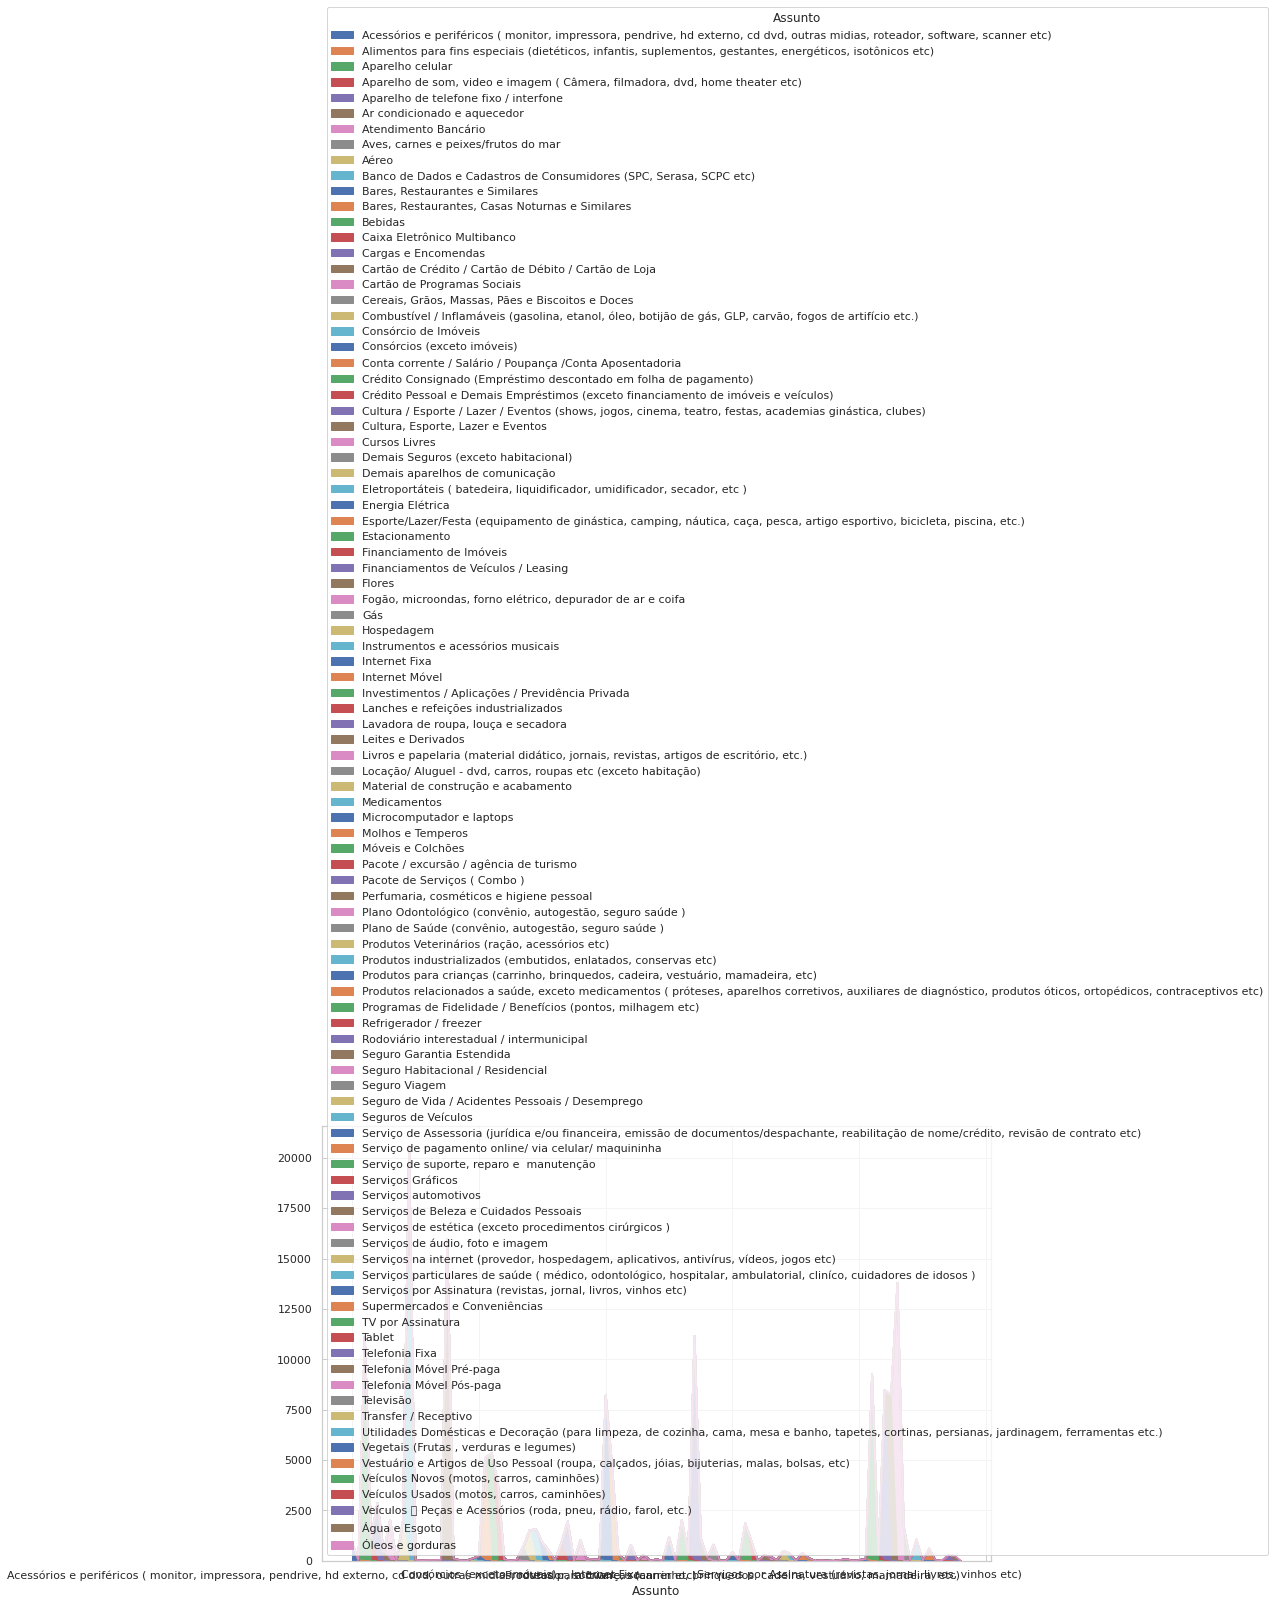

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('Assunto')['Assunto'].value_counts().unstack().plot.area(ax=ax)
